In [1]:
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

In [2]:
%matplotlib inline
from preprocess import KNeighborsImputer, rename_columns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [3]:
field_codes = {1: "Law", 2: "Math", 3: "Social Science, Psychologist", 4: "Medical Science, Pharmaceuticals, and Bio Tech", 5: "Engineering", 6: "English/Creative Writing/ Journalism", 7: "History/Religion/Philosophy", 8: "Business/Econ/Finance ", 9: "Education, Academia", 10: "Biological Sciences/Chemistry/Physics", 11: "Social Work", 12: "Undergrad/undecided ", 13:"Political Science/International Affairs", 14:"Film", 15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"}

In [4]:
frame=rename_columns(pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1"))
frame['mn_sat'] = frame.mn_sat.str.replace(r',','').astype(float)
frame['tuition'] = frame.tuition.str.replace(r',','').astype(float)
frame['income'] = frame.income.str.replace(',','').astype(float)
frame['zipcode'] = frame.zipcode.str.replace(',','').astype(float)
frame['field_cd'] = frame.field_cd.map(field_codes)

findex=frame.gender==0
mindex=frame.gender==1

In [5]:
_id = pd.Index(['iid','pid'])
personal_attributes = pd.Index(['gender','age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'initial_race_importance', 'initial_religion_importance', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga'])
pre_survey = pd.Index(['initial_happy_expectation', 'initial_number_expectation', 'initial_attractive_importance', 'initial_sincere_importance', 'initial_intelligence_importance', 'initial_fun_importance', 'initial_ambitious_importance', 'initial_shared_interests_importance', 'initial_attractive_same_importance', 'initial_sincere_same_importance', 'initial_intelligence_same_importance', 'initial_fun_same_importance', 'initial_ambitious_same_importance', 'initial_shared_same_importance', 'initial_attractive_opposite_importance', 'initial_sincere_opposite_importance', 'initial_intelligence_opposite_importance', 'initial_fun_opposite_importance', 'initial_ambitious_opposite_importance', 'initial_shared_opposite_importance', 'initial_attractive_self_measure', 'initial_sincere_self_measure', 'initial_fun_self_measure', 'initial_intelligence_self_measure', 'initial_ambitious_self_measure', 'initial_attractive_others_measure', 'initial_sincere_others_measure', 'initial_intelligence_others_measure', 'initial_fun_others_measure', 'initial_ambitious_others_measure'])
decisions = pd.Index(['dec','match'])
partner_attributes = pd.Index(['pid','partner','int_corr', 'samerace','age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o'])
wave_conditions = pd.Index(['condtn', 'wave', 'round', 'position','positin1', 'order'])
during_survey = pd.Index(['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob','met'])
halfway_survey = pd.Index(['match_es', 'halfway_attractive_importance','halfway_sincere_importance', 'halfway_intelligence_importance','halfway_fun_importance', 'halfway_ambitious_importance','halfway_shared_interests_importance','halfway_attractive_self_measure', 'halfway_sincere_self_measure','halfway_intelligence_self_measure', 'halfway_fun_self_measure','halfway_ambitious_self_measure'])
followup_survey = pd.Index(['followup_overall_satisfaction','followup_length_dates_satisfaction','followup_num_dates_satisfaction','followup_attractive_influence','followup_sincere_influence','followup_intelligence_influence','followup_fun_influence','followup_ambitious_influence','followup_shared_interests_influence','followup_attractive_importance','followup_sincere_importance','followup_intelligence_importance','followup_fun_importance','followup_ambitious_importance','followup_shared_interests_importance','followup_attractive_same_importance','followup_sincere_same_importance','followup_intelligence_same_importance','followup_fun_same_importance','followup_ambitious_same_importance','followup_shared_same_importance','followup_attractive_opposite_importance','followup_sincere_opposite_importance','followup_intelligence_opposite_importance','followup_fun_opposite_importance','followup_ambitious_opposite_importance','followup_shared_opposite_importance','followup_attractive_self_measure','followup_sincere_self_measure','followup_intelligence_self_measure','followup_fun_self_measure','followup_ambitious_self_measure','followup_attractive_others_measure','followup_sincere_others_measure','followup_intelligence_others_measure','followup_fun_others_measure','followup_ambitious_others_measure',])
final_survey = pd.Index(['final_you_call_count','final_them_call_count','final_match_dates','final_num_match_seen','final_num_match_dates','final_attractive_importance','final_sincere_importance','final_intelligence_importance','final_fun_importance','final_ambitious_importance','final_shared_interests_importance','final_attractive_influence','final_sincere_influence','final_intelligence_influence','final_fun_influence','final_ambitious_influence','final_shared_interests_influence','final_attractive_same_importance','final_sincere_same_importance','final_intelligence_same_importance','final_fun_same_importance','final_ambitious_same_importance','final_shared_same_importance','final_attractive_opposite_importance','final_sincere_opposite_importance','final_intelligence_opposite_importance','final_fun_opposite_importance','final_ambitious_opposite_importance','final_shared_opposite_importance','final_attractive_self_measure','final_sincere_self_measure','final_intelligence_self_measure','final_fun_self_measure','final_ambitious_self_measure','final_attractive_others_measure','final_sincere_others_measure','final_intelligence_others_measure','final_fun_others_measure','final_ambitious_others_measure',])

In [6]:
frame.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,final_attractive_self_measure,final_sincere_self_measure,final_intelligence_self_measure,final_fun_self_measure,final_ambitious_self_measure,final_attractive_others_measure,final_sincere_others_measure,final_intelligence_others_measure,final_fun_others_measure,final_ambitious_others_measure
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [7]:
fframe = frame.loc[findex].copy()
mframe = frame.loc[mindex].copy()

## Cleaning 

In [8]:
text_columns = frame.dtypes[(frame.dtypes==object) & (~frame.dtypes.index.str.contains('name'))].index
frame[text_columns] = frame[text_columns].apply(lambda x: x.astype('category'))
categorical_columns = frame.dtypes[frame.dtypes=='category'].index
categorical_features = frame[categorical_columns]
for col in categorical_columns:
    categorical_features[col+'_code'] = categorical_features[col].cat.codes
categorical_features.head()

,field,field_cd,undergra,from,career,field_code,field_cd_code,undergra_code,from_code,career_code
0,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
1,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
2,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
3,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300
4,Law,Law,NaN,Chicago,lawyer,123,10,-1,49,300


In [9]:
unique_date = wave_conditions.drop(['condtn','positin1','round']).tolist()

attributes_columns = (pre_survey | personal_attributes | _id | ['match'] | unique_date)
attributes_frame = frame.loc[:,attributes_columns].copy()

In [10]:
attributes_frame.dropna(axis=1,thresh=8200,inplace=True)
attributes_frame.dropna(subset=['pid'],inplace=True)

for col in attributes_frame.columns:
    if hasattr(attributes_frame[col],'cat'):
        attributes_frame[col] = attributes_frame[col].cat.codes
attributes_frame = attributes_frame.replace(-1,np.nan)
attributes_frame.dropna(thresh=45,inplace=True)

In [11]:
#imputer = KNeighborsImputer(n_neighbors=6)
#filled_attributes_frame = imputer.fit_transform(attributes_frame).astype(int)
#filled_attributes_frame.to_pickle('imputed.pkl')
filled_attributes_frame = pd.read_pickle('imputed.pkl')

## Exploring

In [12]:
explore_frame = frame.copy()

from sklearn.preprocessing import MinMaxScaler

explore_frame['gender'] = explore_frame.gender.map({0:'Female',1:'Male'})
females = explore_frame.gender.where(explore_frame.gender=='Female').dropna().index
males = explore_frame.gender.where(explore_frame.gender=='Male').dropna().index

In [13]:
sns.set_context(context='poster', font_scale=1, rc={'figure.dpi':'1200','font.fantasy':'Western'})
sns.set_style('white')
#sns.set_style("font", {"xtick.major.size": 8, "ytick.major.size": 8})

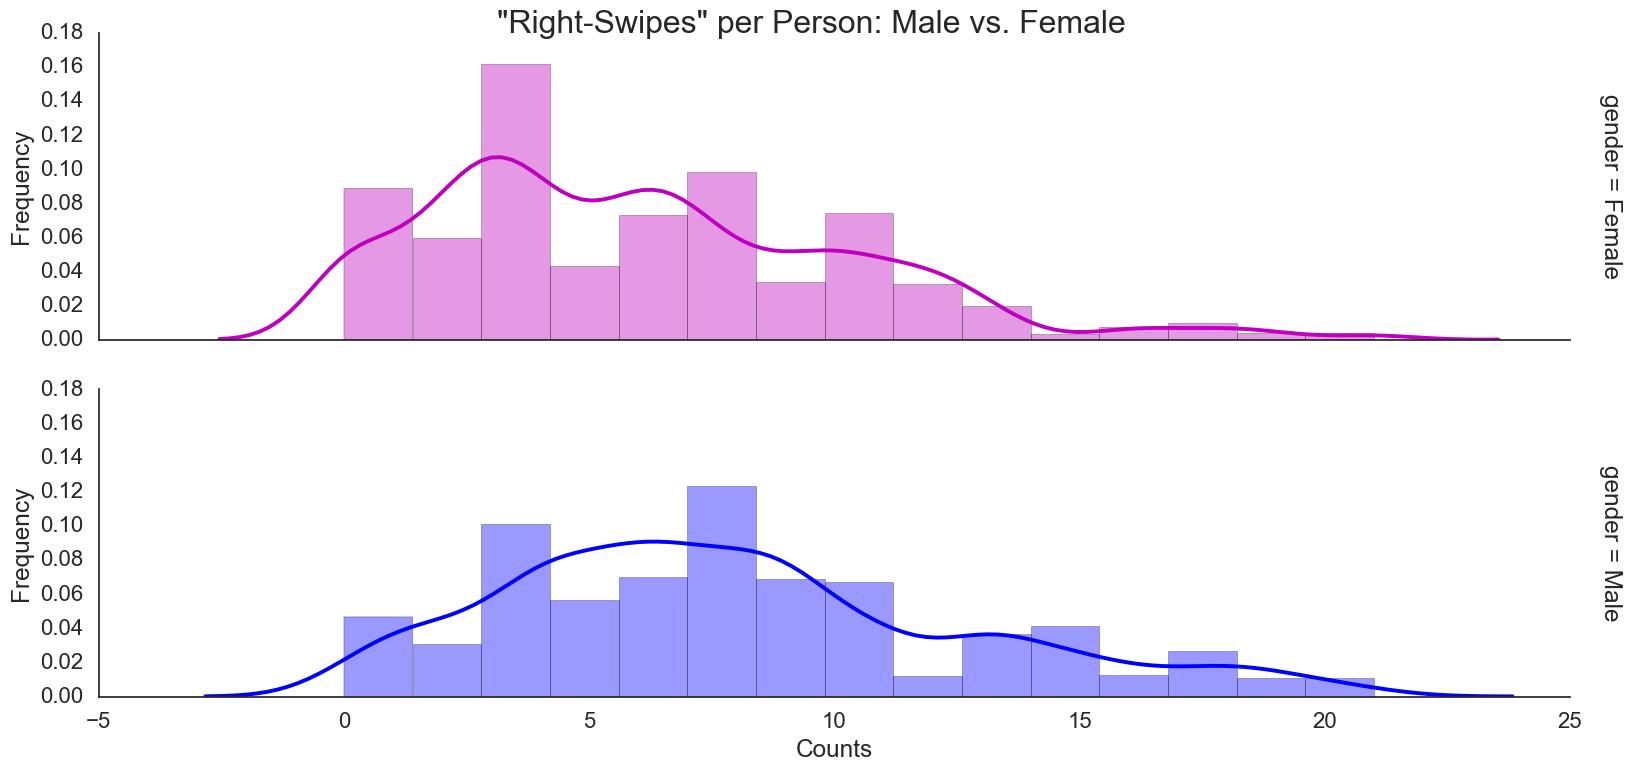

In [14]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['dec_person'] = explore_frame.groupby(['iid'])['dec'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['dec_person'] = explore_frame['round'] - explore_frame['dec_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('"Right-Swipes" per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'dec_person',bins=15,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
g.savefig('../Assets/decs_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)
plt.show();

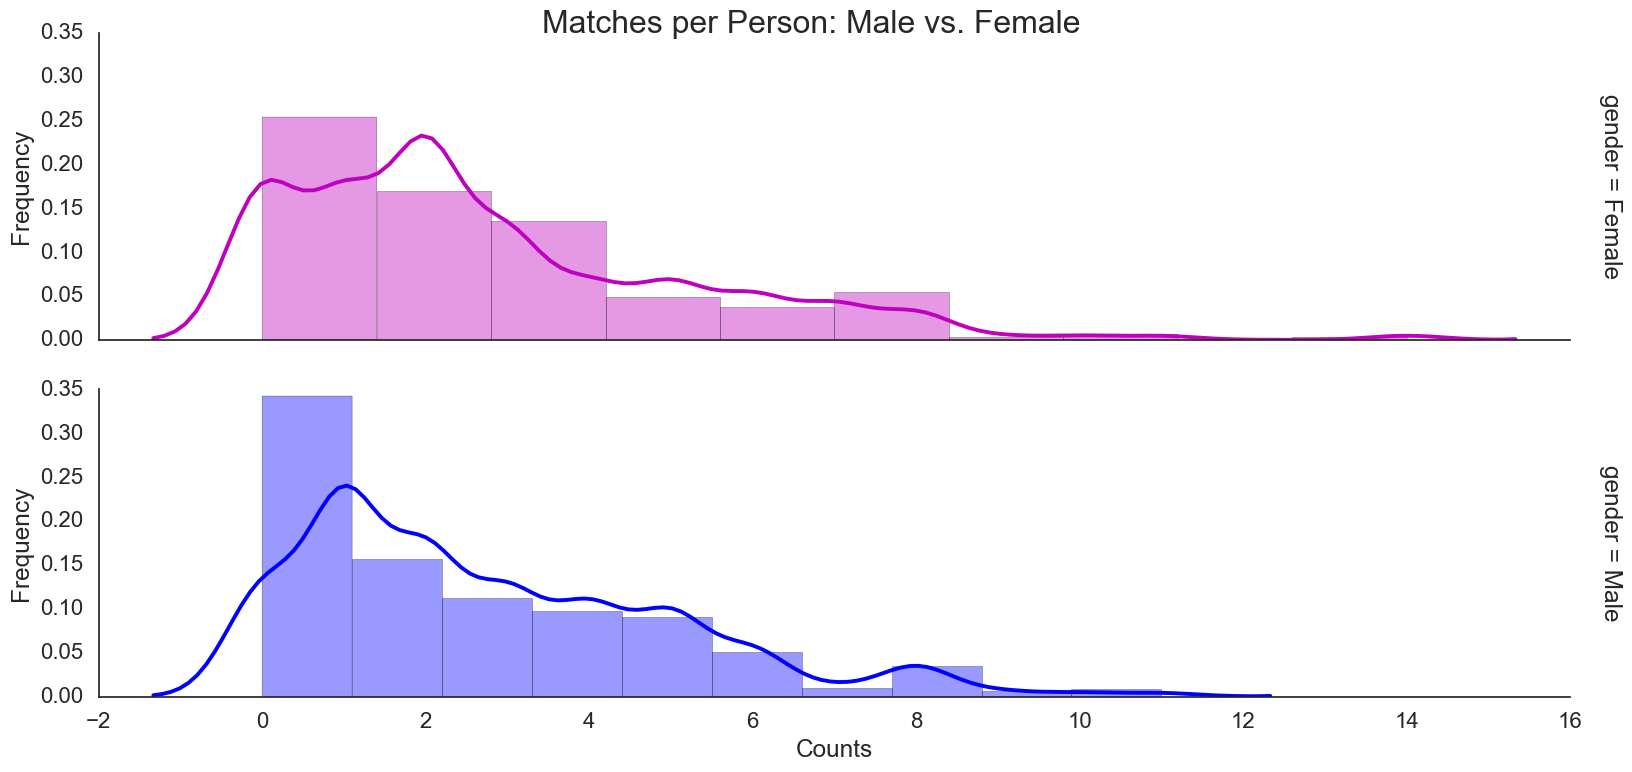

In [15]:
minmax = MinMaxScaler(feature_range=(0,5))

explore_frame['match_person'] = explore_frame.groupby(['iid'])['match'].transform(lambda x: (~x.astype(bool)).sum())
explore_frame['match_person'] = explore_frame['round'] - explore_frame['match_person']

g = sns.FacetGrid(explore_frame, row='gender', hue='gender', palette={"Female":'m',"Male":'b'},
                  aspect=4,size=4,margin_titles=True,)

g.fig.suptitle('Matches per Person: Male vs. Female',fontsize='large')
g.map(sns.distplot,'match_person',bins=10,)
g.set_xlabels(label='Counts')
g.set_ylabels(label='Frequency')
g.savefig('../Assets/matches_per_person.svg', format='svg', dpi=1200,bbox_inches='tight',transparent=True)

plt.show();

In [16]:
iid_attributes = attributes_frame.groupby('iid').first().drop(['pid','match']+unique_date,axis=1)
iid_attributes[['field', 'field_cd', 'from', 'career']] = iid_attributes[['field', 'field_cd', 'from', 'career']].apply(lambda x: x.astype('category'))
iid_attributes['field_cd'] = iid_attributes.field_cd.map(field_codes).astype('category')
plot_columns = iid_attributes.columns.str.replace('_',' ').str.title()
iid_attributes['gender'] = iid_attributes.gender.map({0:'Female',1:'Male'})
female_attributes = iid_attributes.loc[iid_attributes.gender=="Female"].drop('gender',axis=1)
male_attributes = iid_attributes.loc[iid_attributes.gender=="Male"].drop('gender',axis=1)
#iid_attributes.field = iid_attributes.field.cat.codes
findex=female_attributes.index 
mindex=male_attributes.index

In [17]:
field_counts = pd.DataFrame()
field_counts['Females'] = iid_attributes.loc[findex,'field_cd'].value_counts(normalize=True)
field_counts['Males'] = iid_attributes.loc[mindex,'field_cd'].value_counts(normalize=True)
field_counts['diff'] = field_counts.Males - field_counts.Females

field_counts['Gender'] = np.where(field_counts['diff'] > 0,'Male','Female'); field_counts

field_counts.sort_values(by='diff',inplace=True,ascending=False)
field_counts['diff'] = field_counts['diff'].abs()*500
field_counts = field_counts.reset_index().rename(columns={'index':'Field'}); field_counts.head()

,Field,Females,Males,diff,Gender
0,Math,0.111524,0.366300,127.388101,Male
1,"Medical Science, Pharmaceuticals, and Bio Tech",0.048327,0.157509,54.591010,Male
2,Biological Sciences/Chemistry/Physics,0.074349,0.102564,14.107330,Male
3,Social Work,0.018587,0.032967,7.189836,Male
4,Architecture,0.000000,0.003663,1.831502,Male


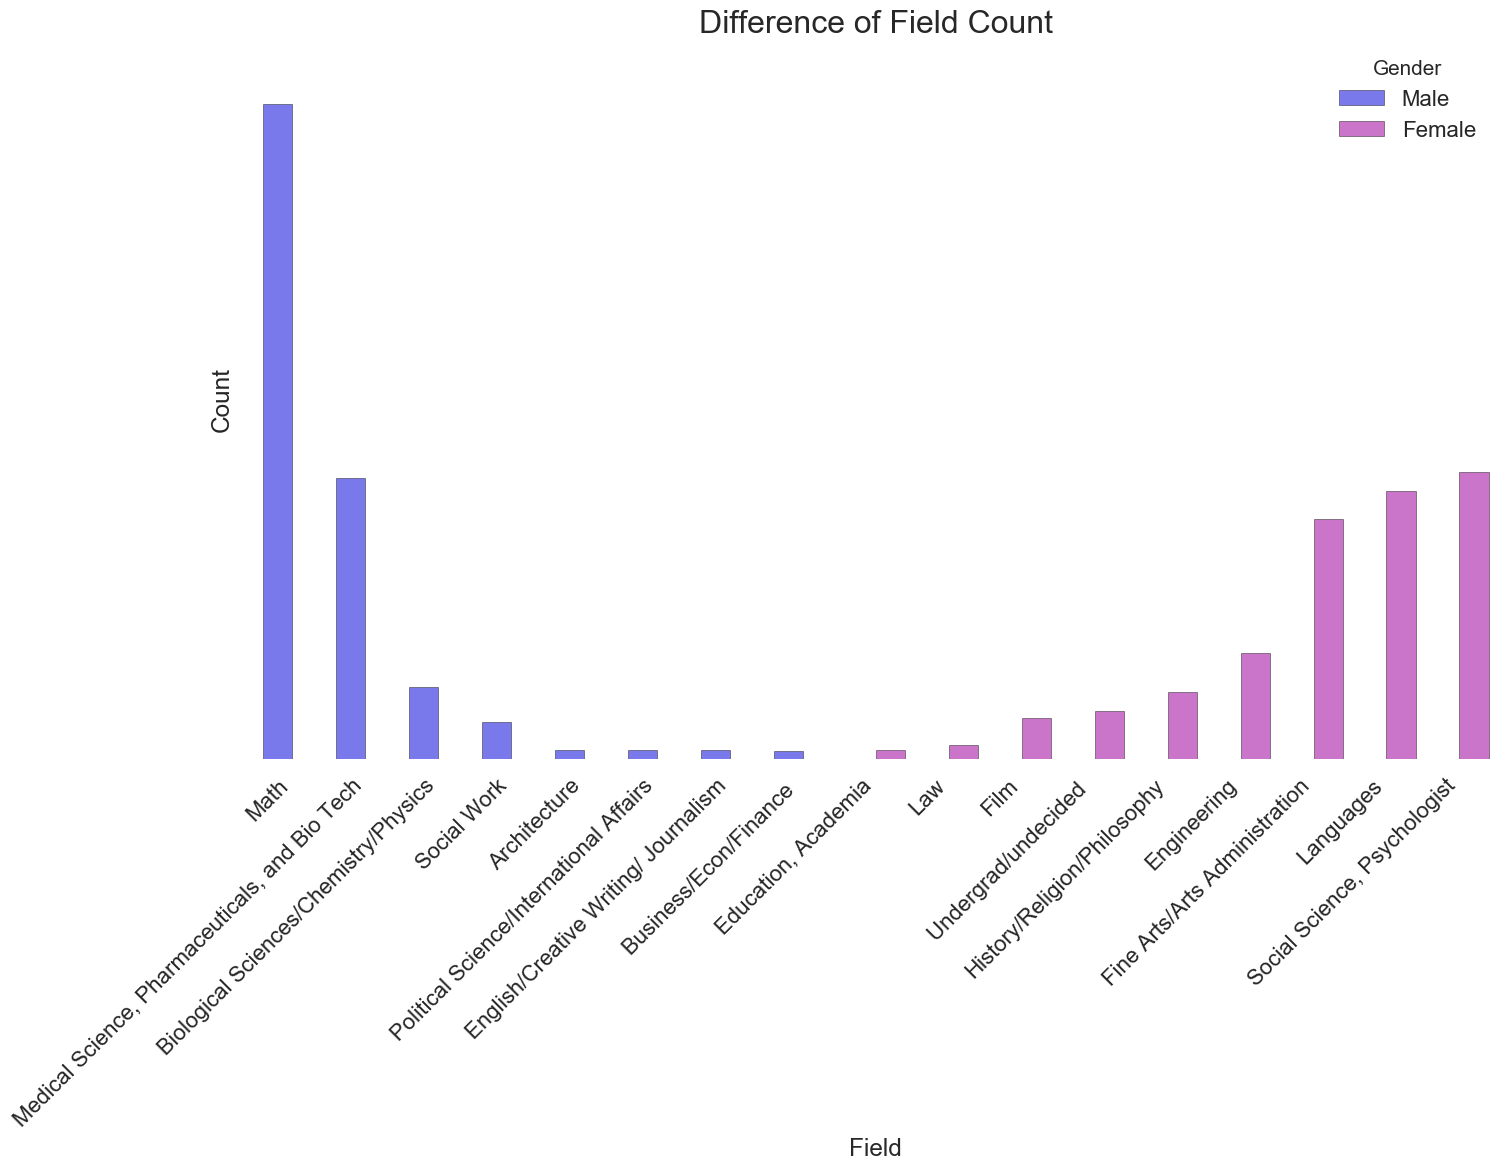

In [18]:
fig = plt.figure(figsize=(16,8))
ax0 = fig.add_subplot(111)

field_bar = sns.barplot(x='Field', y='diff', hue='Gender', data=field_counts,order=field_counts['Field'].tolist(),
                        alpha=.6,palette={"Female":'m',"Male":'b'},ax=ax0)
field_bar.set_title('Difference of Field Count',fontsize='large')
field_bar.set_autoscale_on(True)
field_bar.set_ylabel('Count')
field_bar.set_yticklabels('')
field_bar.figure.autofmt_xdate(bottom=0,rotation=45)
ax0.set_frame_on(False)
field_bar.figure.savefig('../Assets/field_count_diff.svg', format='svg', dpi=1200,bbox_inches='tight',
                         transparent=True)
plt.show();

In [34]:
att_plot[num_col[:5]]

,age,art,clubbing,concerts,date
iid,,,,,
1,21.412119,1.822709,5.022690,12.225348,7.478051
2,26.367772,6.048930,8.418115,9.281137,5.509678
3,25.300046,5.072135,5.944026,7.769909,3.137642
4,23.186971,7.027366,7.115177,9.871644,5.714081
5,21.310198,8.626100,8.124773,3.349110,4.444273
6,25.647792,7.272937,6.154530,6.816735,5.494787
7,23.926079,10.354989,8.610968,10.678593,5.182439
8,26.226921,10.092890,10.822841,7.121193,6.613870
9,26.944894,7.221602,11.077534,10.170024,5.149974


In [45]:
att_plot[num_col[:4]]

,age,art,clubbing,concerts
iid,,,,
1,21.412119,1.822709,5.022690,12.225348
2,26.367772,6.048930,8.418115,9.281137
3,25.300046,5.072135,5.944026,7.769909
4,23.186971,7.027366,7.115177,9.871644
5,21.310198,8.626100,8.124773,3.349110
6,25.647792,7.272937,6.154530,6.816735
7,23.926079,10.354989,8.610968,10.678593
8,26.226921,10.092890,10.822841,7.121193
9,26.944894,7.221602,11.077534,10.170024


ValueError: max must be larger than min in range parameter.

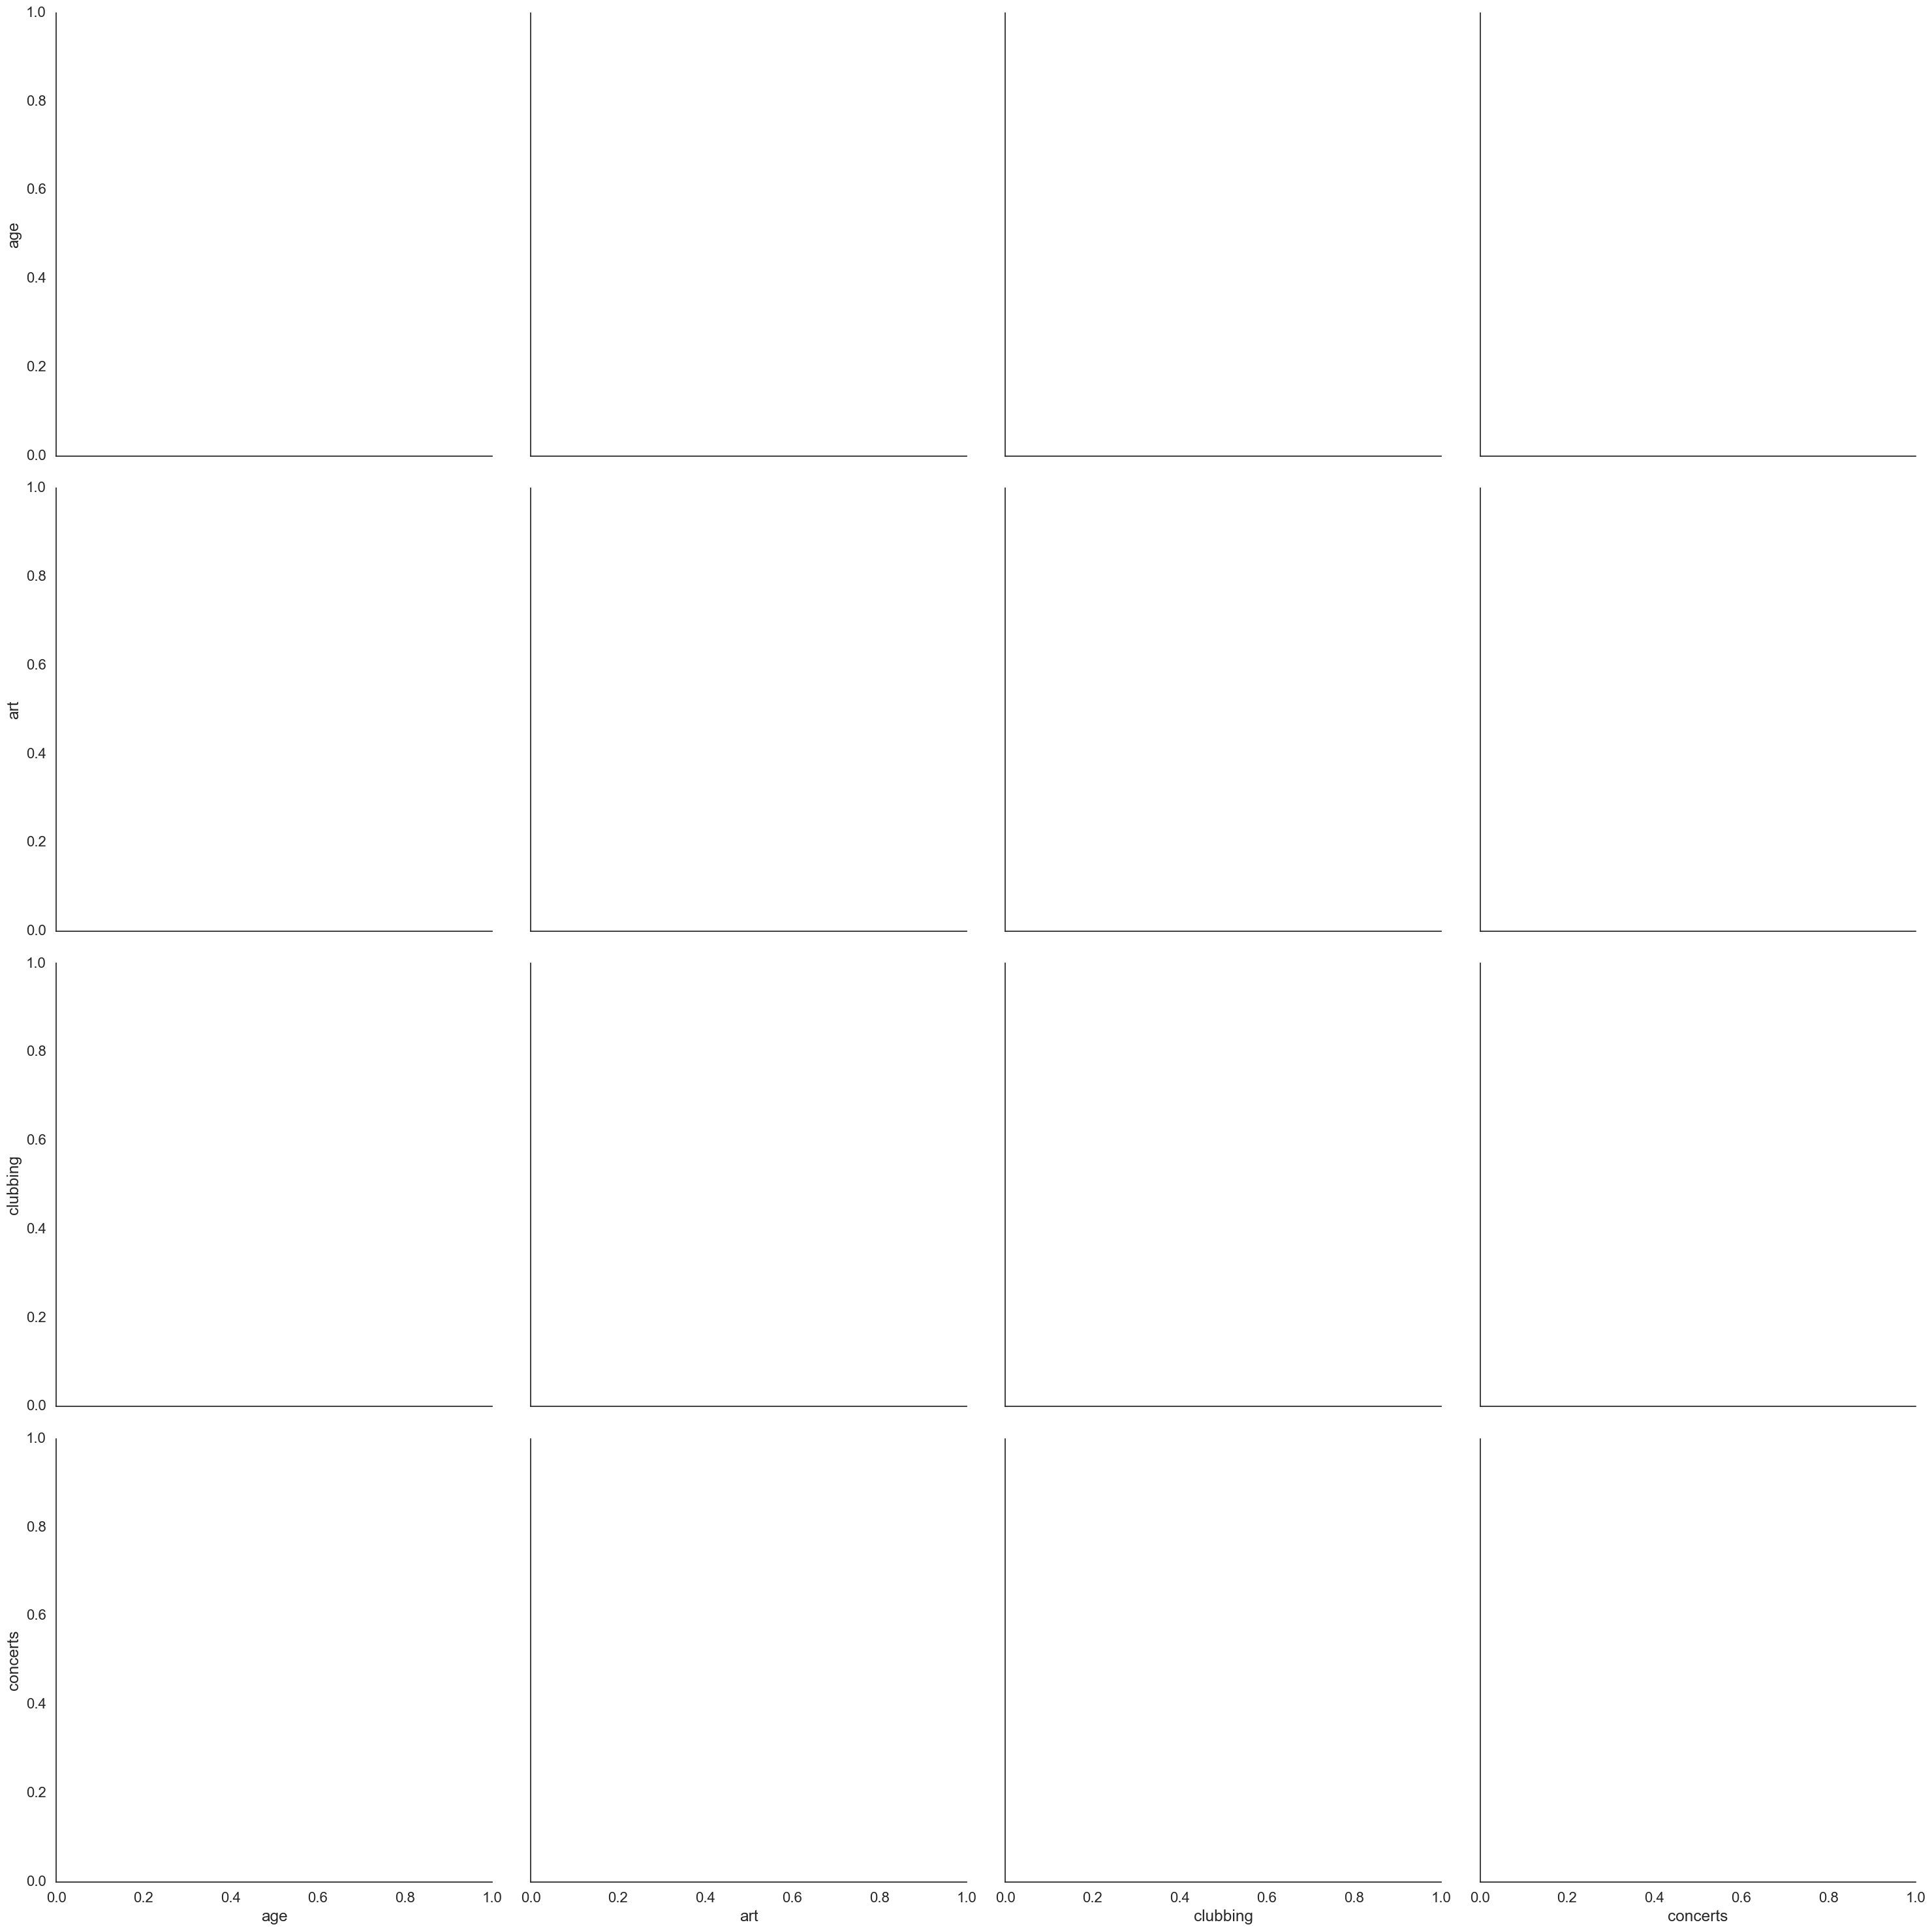

In [46]:
att_plot[num_col][:10].corr()

p=sns.pairplot(att_plot[num_col[:4]],size=7.5)
p.;

In [20]:
att_plot = iid_attributes.copy()
s=att_plot.shape[0]
num_col = att_plot.dtypes[att_plot.dtypes==(float or int)].index
att_plot.loc[:,num_col] = att_plot.loc[:,num_col].apply(lambda x: x+np.random.exponential(.7,s))

#pd.scatter_matrix(att_plot[num_col].iloc[:,10:20],);

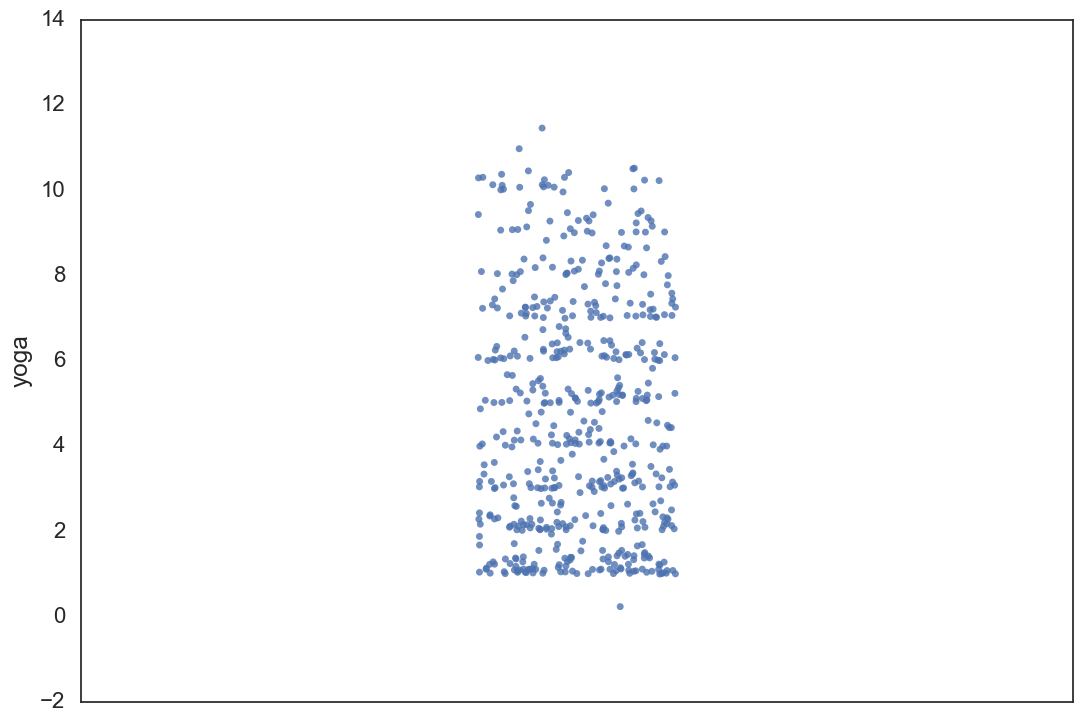

In [37]:
sns.stripplot(y='yoga',data=att_plot,jitter=True,hue='gender',alpha=.8,)

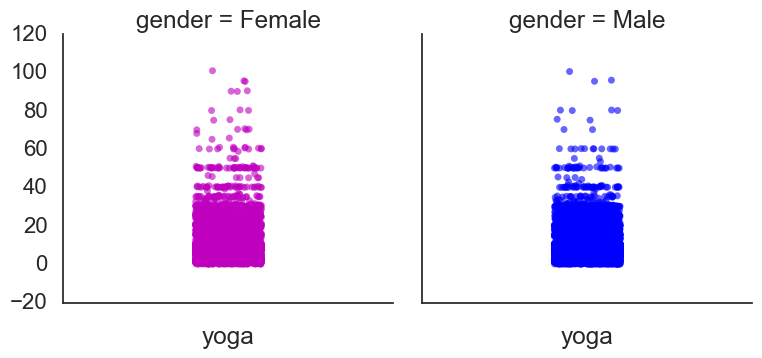

In [42]:
g = sns.FacetGrid(data=att_plot,size=4,aspect=1,hue='gender',col='gender',palette={"Female":'m',"Male":'b'})
for col in num_col:
    g.map(sns.stripplot,col,jitter=True,orient='v',alpha=.6)

plt.show();

## Predict

In [ ]:
fmask_attributes = filled_attributes_frame.loc[frame.gender==0].drop('gender',axis=1)
mmask_attributes =  filled_attributes_frame.loc[frame.gender==1].drop('gender',axis=1)

In [ ]:
grouped_female_attributes = fmask_attributes.groupby(unique_date).first()
grouped_male_attributes = mmask_attributes.groupby(unique_date).first()
merged_attributes = grouped_female_attributes.merge(grouped_male_attributes,how='inner',left_index=True,right_index=True)

In [ ]:
merged_attributes = merged_attributes.drop(['pid_x','pid_y','match_y'],axis=1).rename(columns={'match_x':'match'})

In [ ]:
dataset = merged_attributes
X = merged_attributes.drop("match",axis=1)
y = merged_attributes["match"]
predictors = merged_attributes.drop(["match",'iid_y','iid_x'],axis=1).columns

In [ ]:
from sklearn.linear_model import LogisticRegression 
from imblearn import over_sampling,combine
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
def modelfit(model, data, xcolumns=predictors, ycolumn='match', title='Model', test_size=.25, n_folds=3, scale_data=True):
    
    from sklearn.cross_validation import StratifiedKFold, train_test_split,cross_val_score
    from sklearn.metrics import classification_report, accuracy_score, roc_auc_score 
    
    
    if scale_data:
        data[xcolumns] = scale(data[xcolumns])
    
    train_data, test_data = train_test_split(data, test_size=test_size,stratify=data.match)
    xtrain, ytrain, xtest, ytest = train_data[predictors], train_data['match'], test_data[predictors], test_data['match']
    
    kfold = StratifiedKFold(ytrain, n_folds=n_folds)
    
    sns.set_palette(palette='muted')
    
    resamp = combine.SMOTETomek()
    #resamp = over_sampling.RandomOverSampler()
    xresamp, yresamp = resamp.fit_sample(xtrain, ytrain)
    
    model.fit(xresamp, yresamp)        
    predictions = model.predict(xtest)
    probability = model.predict_proba(xtest)[:,1]
    cv_score = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='roc_auc')
    
    #precision, recall, fbeta_score, support = precision_recall_fscore_support(test_data['dec'].values, predictions)
    
    print(classification_report(test_data[ycolumn].values, predictions))
    print ("Classification\n")
    print ("Accuracy : {0:.4f}".format(accuracy_score(ytest, predictions)))
    print ("AUC Score (Train): {0:.4f}".format(roc_auc_score(ytest, probability)))
    print ("CV Score : Mean {0:.4f} | Std {0:.4f} | Min {0:.4f} | Max {0:.4f}".format(
            np.mean(cv_score),
            np.std(cv_score),
            np.min(cv_score),
            np.max(cv_score)))
    plt.rc({'font.size': 10.0})
    
    if hasattr(model,'feature_importances_'):  
        plt.figure(figsize=(13,5))
        feat_imp = pd.Series(model.feature_importances_, xcolumns).sort_values(ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importances',fontsize=10)
        plt.title('Feature Importances: {}'.format(title),fontdict={'size': 10})
        plt.ylabel('Feature Importance',fontsize=10)
        
        
    elif hasattr(model,'coef_'):
        if hasattr(model,'kernel') and (model.kernel == 'rbf'):
            print('No COEFs')
        else:
            plt.figure(figsize=(13,5))
            coefs_imp = pd.Series(model.coef_[0], xcolumns).sort_values(ascending=False)
            coefs_imp.plot(kind='bar',title='Coef Values: {}'.format(title),fontsize=10)
            plt.title('Coef Values',fontdict={'size': 10})
            plt.ylabel('Coef Values',fontsize=10)
        
    
    plt.show()
    print()
    print()
    return model, train_data, test_data

In [ ]:
lgr = LogisticRegression(C=1,penalty='l2')

# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
lgr, train_data, test_data = modelfit(lgr, dataset, predictors, 'match', 'Logistic Regression', n_folds=4,test_size=.20)

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=10,probability=True)

# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
svc, train_data, test_data = modelfit(svc, dataset, predictors, 'match', 'SVC', n_folds=4,test_size=.20)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.001, min_samples_split=16, n_estimators=3500,
                                                               min_samples_leaf=5,
                                                               max_depth=7,
                                                               max_features='sqrt',
                                                               subsample=0.8)
# modelfit(model, data, xcolumns, ycolumn, title, n_folds=0.25)
gbc, train_data, test_data = modelfit(gbc, dataset, predictors, 'match', 'GBC', n_folds=4,test_size=.20,scale_data=False)

In [ ]:
model = LogisticRegression(C=1,penalty='l2')
model = SVC(kernel='',probability=True)

resamp = combine.SMOTEENN(k=4, m=12,)
xresamp, yresamp = resamp.fit_sample(train_data[predictors], train_data.match)

#kfold = StratifiedKFold(yresamp,n_folds=4)
#rfe = RFECV(model, step=1, cv=kfold, scoring='recall', estimator_params=None, verbose=1)

#rfe.fit(scale(xresamp),yresamp)
#print(classification_report(test_data.match, rfe.predict(scale(test_data[predictors]))))


model.fit(scale(xresamp),yresamp)
print(classification_report(test_data.match, model.predict(scale(test_data[predictors]))))

In [ ]:
def roc_curve_plot(y_true, y_score):
    from sklearn.metrics import roc_curve, auc

    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

In [ ]:
lgr.predict_proba(test_data[predictors])[:,1]

In [ ]:
roc_curve_plot(y_true=test_data['match'],y_score=lgr.predict_proba(test_data[predictors])[:,1])